In [4]:
!pip install deepface
!pip install Pillow #librería de Python para trabajar con imágenes

In [12]:
import numpy as np
from deepface import DeepFace
from google.colab import files
import os
import glob
import matplotlib.pyplot as plt

for archivo in glob.glob("/content/foto*.jpg"):
    os.remove(archivo)

# Subir las fotos desde tu PC
uploaded = files.upload()

25-09-17 03:10:26 - Directory /root/.deepface has been created
25-09-17 03:10:26 - Directory /root/.deepface/weights has been created


Saving foto1.jpg to foto1.jpg
Saving foto2.jpg to foto2.jpg


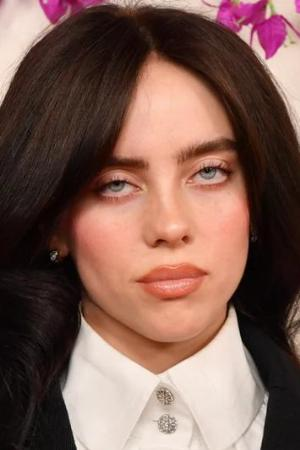

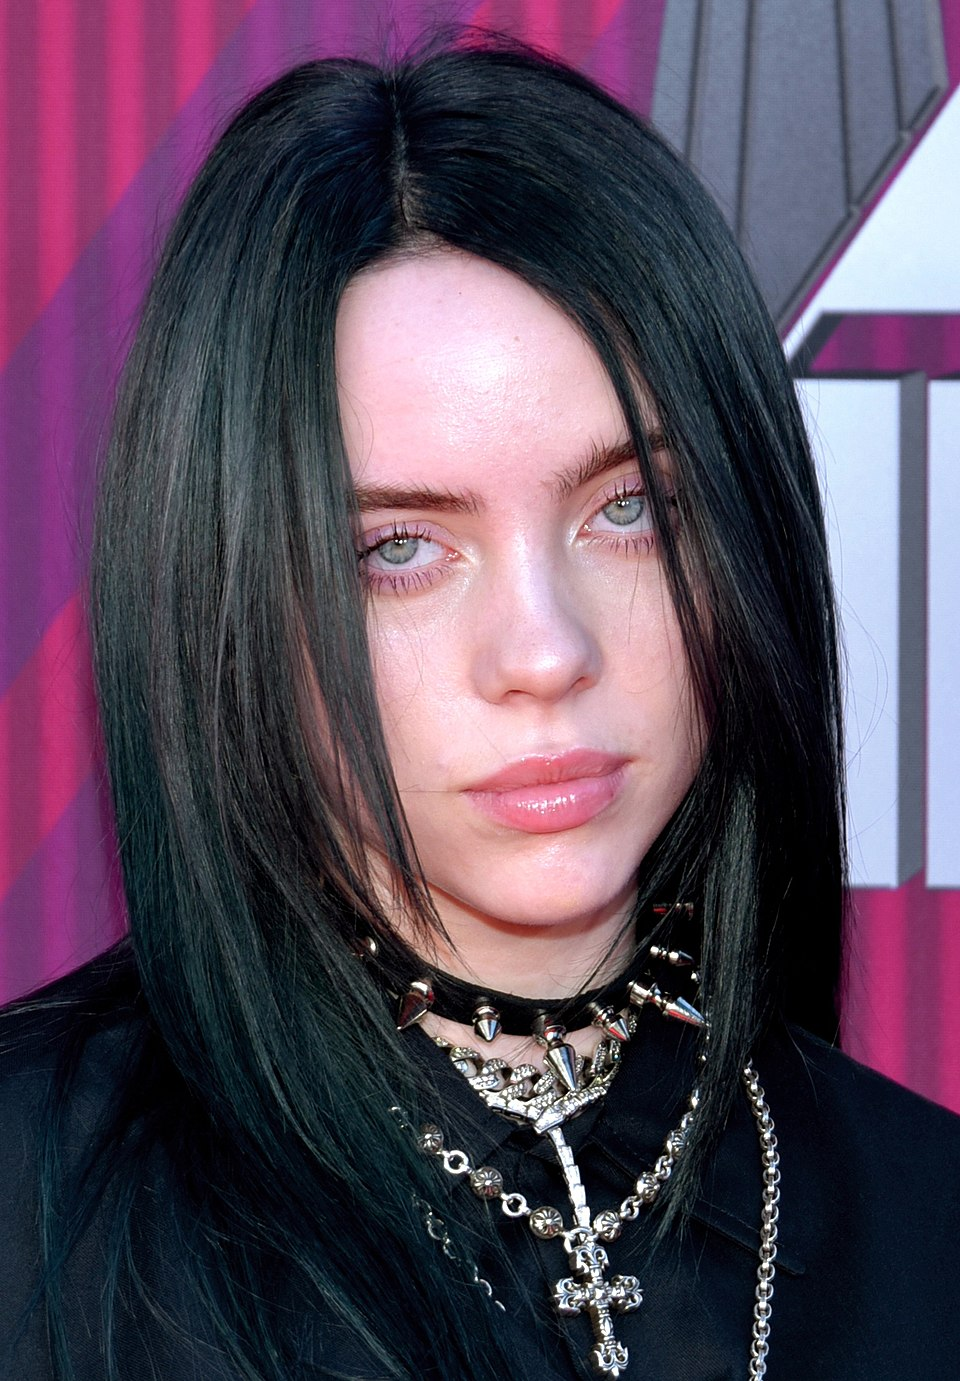

In [13]:
# Muestra las imágenes EXACTAMENTE como están en el archivo (sin cambios)
from IPython.display import display, Image as IPyImage

img1 = "/content/foto1.jpg"
img2 = "/content/foto2.jpg"

for p in (img1, img2):
    display(IPyImage(filename=p))


In [17]:
# Obtenemos embeddings (128D o 512D según el modelo)
v = np.array(DeepFace.represent(img_path=img1, model_name="Facenet")[0]["embedding"])
u = np.array(DeepFace.represent(img_path=img2, model_name="Facenet")[0]["embedding"])

Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facenet_weights.h5
To: /root/.deepface/weights/facenet_weights.h5


25-09-17 05:06:07 - 🔗 facenet_weights.h5 will be downloaded from https://github.com/serengil/deepface_models/releases/download/v1.0/facenet_weights.h5 to /root/.deepface/weights/facenet_weights.h5...


100%|██████████| 92.2M/92.2M [00:00<00:00, 198MB/s]


In [18]:
# 2. Proyección analítica
alpha_star = np.dot(v, u) / np.dot(u, u)
proj_analitica = alpha_star * u

print("Coeficiente óptimo (analítico):", alpha_star)

Coeficiente óptimo (analítico): 0.6263344102907928


In [20]:
# 3. Descenso de gradiente
eta = 0.001
alpha = 0.0
iteraciones = 100
trayectoria = [alpha]
for t in range(iteraciones):
    grad = 2 * alpha * np.dot(u, u) - 2 * np.dot(v, u)
    alpha = alpha - eta * grad
    trayectoria.append(alpha)

proj_gd = alpha * u
print("Coeficiente final (GD):", alpha)


Coeficiente final (GD): 0.6263344102907927


Cosine similarity (v, u): 0.657982976526027
Cosine similarity (proj(v), u): 1.0


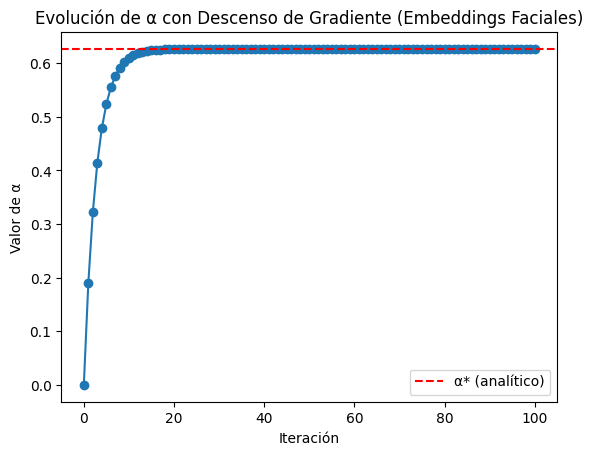

In [22]:
# 4. Comparación
cos_sim_original = np.dot(v, u) / (np.linalg.norm(v) * np.linalg.norm(u))
cos_sim_proj = np.dot(proj_analitica, u) / (np.linalg.norm(proj_analitica) * np.linalg.norm(u))

print("Cosine similarity (v, u):", cos_sim_original)
print("Cosine similarity (proj(v), u):", cos_sim_proj)

# 5. Evolución de alpha
plt.plot(trayectoria, marker="o")
plt.axhline(alpha_star, color="red", linestyle="--", label="α* (analítico)")
plt.xlabel("Iteración")
plt.ylabel("Valor de α")
plt.title("Evolución de α con Descenso de Gradiente (Embeddings Faciales)")
plt.legend()
plt.show()